In [154]:
import pandas as pd
import matplotlib.pyplot as plt

In [155]:
dataset=pd.read_csv(r"C:\Users\HP\Downloads\archive (8)\position_salaries.csv")

In [156]:
dataset.head(12)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


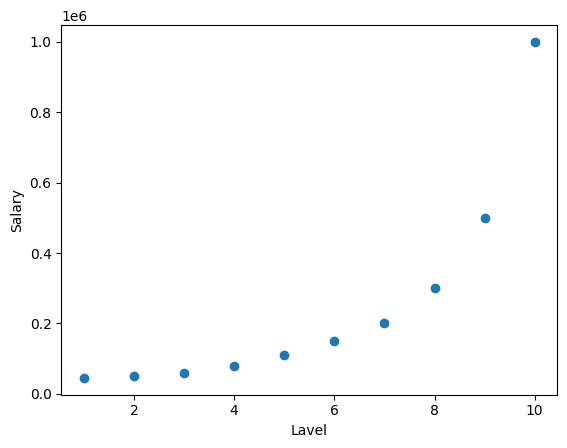

In [157]:
plt.scatter(dataset["Level"],dataset["Salary"])
plt.xlabel("Lavel")
plt.ylabel("Salary")
plt.show()

In [158]:
dataset.corr(numeric_only=True)

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


In [159]:
x=dataset[["Level"]]
y=dataset[["Salary"]]

In [160]:
from sklearn.preprocessing import PolynomialFeatures

In [161]:
pf=PolynomialFeatures(degree=6)
pf.fit(x)
x=pf.transform(x)

In [162]:
from sklearn.model_selection import train_test_split

In [163]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [164]:
from sklearn.linear_model import LinearRegression

In [165]:
lr=LinearRegression()
lr.fit(x_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [166]:
lr.score(x_test,y_test)*100

99.45736852472226

In [167]:
prd=lr.predict(x)

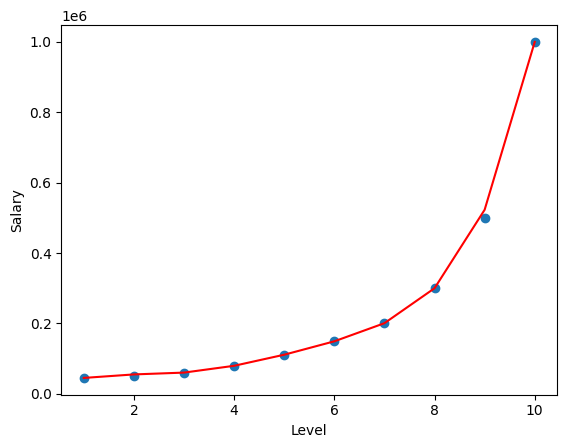

In [168]:
plt.scatter(dataset["Level"],dataset["Salary"])
plt.plot(dataset["Level"],prd,c="red")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [169]:
lr.coef_

array([[ 0.00000000e+00,  1.37040817e+05, -8.63312608e+04,
         2.51092276e+04, -3.27858137e+03,  1.74551228e+02,
        -1.48809527e+00]])

In [170]:
lr.intercept_

array([-27718.37373729])

In [171]:
#y=m1x1+m2x2^2+c
#y=157144.24209541*x1+-44274.84207263*x2^2-83661.2021858

In [172]:
test=pf.transform([[8]])
test

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[1.00000e+00, 8.00000e+00, 6.40000e+01, 5.12000e+02, 4.09600e+03,
        3.27680e+04, 2.62144e+05]])

In [173]:
#whenever we go for deployment,it is to be ensured that iin predict function whatever the data will it will be of polynomial in nature

In [174]:
lr.predict(test)

array([[299862.08821645]])